# Logistic Regression 
# Пример для Данных по дефолту

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression

In [70]:
data = pd.read_csv('Default_islr.csv', sep=';',index_col=0,decimal=',') # Читаем данные

In [11]:
data.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [14]:
data.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

### Визуализируем данные по двум переменным в зависимости от класса

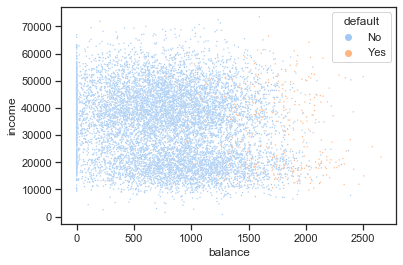

In [24]:
sns.set_theme(style="ticks", palette="pastel")
sns.scatterplot(x=data['balance'],y=data['income'],hue=data['default'],s=2)
#plt.savefig('Default_Scatter.png')

## Есть ли зависимость между переменными и классом?

Анализ с помощью box plot

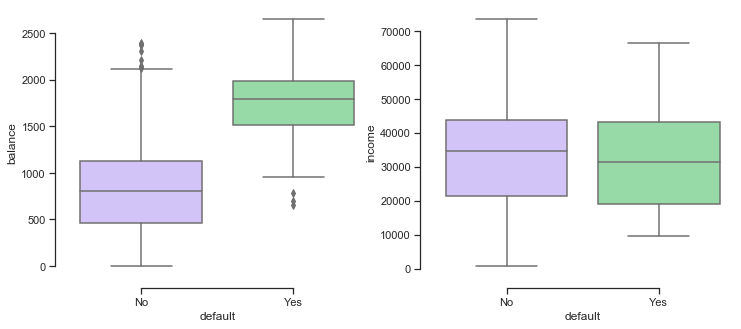

In [34]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(ax=ax[0],x="default", y="balance",
            palette=["m", "g"],
            data=data)
sns.boxplot(ax=ax[1],x="default", y="income",
            palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)
plt.savefig('Default_boxplot.png')

Большая зависимость от переменной balance

## Распределение классов в зависимости от balance

In [39]:
data['Default'] = data['default']=='Yes'

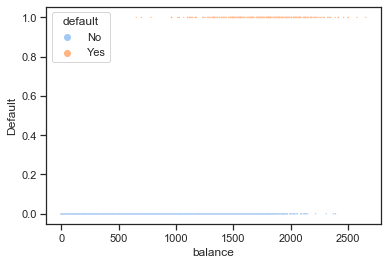

In [41]:
sns.scatterplot(x=data['balance'],y=data['Default'],hue=data['default'],s=2)
plt.savefig('default_yes_no.png')

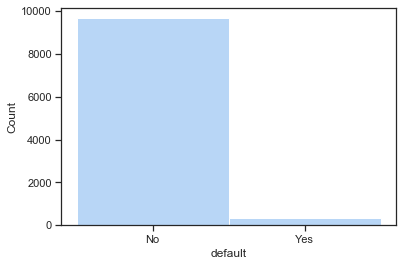

In [121]:
sns.histplot(data['default'])

In [126]:
len(data[data['default']=='Yes'])/len(data)

0.0333

## Обучение логистической регрессии для предсказания класса в зависимости от balance

In [57]:
X = data[['balance']]

In [58]:
y = data['Default']

In [59]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [88]:
p = clf.predict_proba(X)# вероятности

In [89]:
clas = clf.predict(X) # классы 

In [61]:
p.shape

(10000, 2)

In [90]:
clas.shape

(10000,)

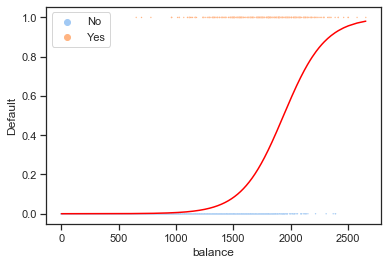

In [64]:
sns.scatterplot(x=data['balance'],y=data['Default'],hue=data['default'],s=2)
sns.lineplot(x=data['balance'],y=p[:,1],estimator='mean',color='red')
plt.savefig('default_logistic_regression.png')

In [67]:
clf.coef_

array([[0.00549892]])

In [68]:
clf.intercept_

array([-10.65132824])

## Проверка метрик и качества обучения

In [115]:
from sklearn.metrics import plot_confusion_matrix # confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split # автоматическое разделение данных на 80/20
from sklearn.model_selection import cross_validate # перекрестная проверка

### Обучение на всех данных, качество на новых данных неизвестно

Трансформация предсказаний вероятности в классы

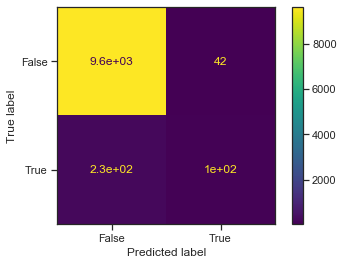

In [91]:
plot_confusion_matrix(clf,X,y)

In [92]:
accuracy_score(y.astype(int),clas)

0.9725

Осторожно, это результат на данных, на которых мы тренировали!

In [94]:
precision_score(y.astype(int),clas)

0.704225352112676

In [95]:
recall_score(y.astype(int),clas) 

0.3003003003003003

Мы находим только 30 % позитивных результатов

### 80/20 деление

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Проверим распределение классов

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


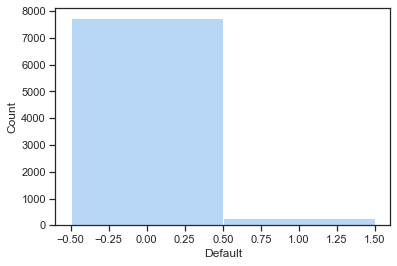

In [124]:
sns.histplot(y_train,discrete=True)

In [127]:
len(y_train[y_train==1])/len(y_train)

0.033

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


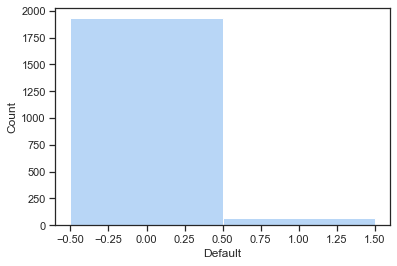

In [128]:
sns.histplot(y_test,discrete=True)

In [129]:
len(y_test[y_test==1])/len(y_test)

0.0345

Тренировка модели

In [97]:
new_model= LogisticRegression(random_state=0).fit(X_train, y_train)

In [98]:
results_train = new_model.predict(X_train)

In [99]:
results_test = new_model.predict(X_test)

**Результаты на данных тренировки**

In [100]:
accuracy_score(y_train, results_train)

0.97325

In [101]:
precision_score(y_train,results_train)

0.711864406779661

In [102]:
recall_score(y_train,results_train)

0.3181818181818182

**Результаты на тест данных**

In [104]:
accuracy_score(y_test,results_test)

0.9685

In [105]:
precision_score(y_test,results_test)

0.6071428571428571

In [106]:
recall_score(y_test,results_test)

0.2463768115942029

Как мы ожидали, мы видим ухудшение всех результатов

### Перекрестная проверка

In [108]:
log_model = LogisticRegression() # нам нужна свежая не обученная модель

In [116]:
res = cross_validate(log_model,X,y,cv=10,scoring=['recall','precision'])

In [117]:
res

{'fit_time': array([0.02119899, 0.02430081, 0.02088284, 0.01929331, 0.01820064,
        0.01756692, 0.01776099, 0.0171051 , 0.01697206, 0.01765203]),
 'score_time': array([0.00325584, 0.00263405, 0.00266504, 0.00228691, 0.00225902,
        0.00240922, 0.00229597, 0.00223684, 0.00223708, 0.00224495]),
 'test_recall': array([0.18181818, 0.3030303 , 0.3030303 , 0.36363636, 0.24242424,
        0.33333333, 0.33333333, 0.29411765, 0.41176471, 0.26470588]),
 'test_precision': array([0.5       , 0.83333333, 0.71428571, 0.63157895, 0.66666667,
        0.64705882, 0.73333333, 0.83333333, 0.77777778, 0.69230769])}

In [118]:
res['test_recall'].mean()

0.3031194295900178

In [119]:
res['test_precision'].mean()

0.7029675621935685

Мы ожидаем отзыв в районе 30%, и точность в районе 70%.